<a href="https://colab.research.google.com/github/hamidhosen42/Machine-Learning-Projects/blob/main/Customer_Churn_Prediction_Using_Python_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv("/content/Customer-Churn-Prediction.csv")

In [3]:
df

customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0     7590-VHVEG  Female              0  ...          29.85        29.85     No
1     5575-GNVDE    Male              0  ...          56.95       1889.5     No
2     3668-QPYBK    Male              0  ...          53.85       108.15    Yes
3     7795-CFOCW    Male              0  ...          42.30      1840.75     No
4     9237-HQITU  Female              0  ...          70.70       151.65    Yes
...          ...     ...            ...  ...            ...          ...    ...
7038  6840-RESVB    Male              0  ...          84.80       1990.5     No
7039  2234-XADUH  Female              0  ...         103.20       7362.9     No
7040  4801-JZAZL  Female              0  ...          29.60       346.45     No
7041  8361-LTMKD    Male              1  ...          74.40        306.6    Yes
7042  3186-AJIEK    Male              0  ...         105.65       6844.5     No

[7043 rows x 21 columns]

In [4]:
df.shape

(7043, 21)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


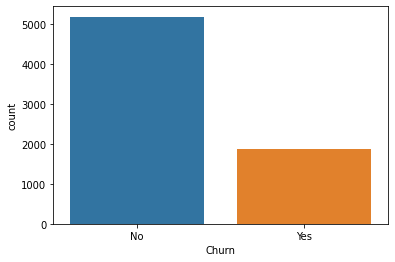

In [5]:
sns.countplot(df['Churn'])

In [6]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [7]:
Churned=df[df.Churn=='Yes'].shape[0]
retained=df[df.Churn=='No'].shape[0]

In [8]:
#Customer left the company
ch_per=((Churned/(Churned+retained))*100)
ch_per

26.536987079369588

In [9]:
#Customer Stayed the company
re_per=((retained/(retained+Churned))*100)
re_per

73.4630129206304

In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162289    32.370865       64.761692
std         0.368742    24.559231       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

### Visulaization

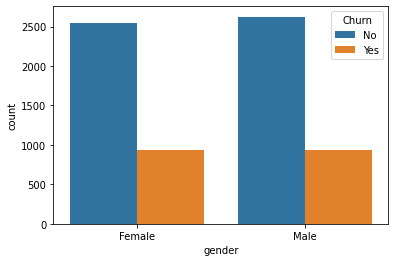

In [12]:
sns.countplot(x='gender',hue='Churn',data=df)

In [13]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [14]:
sns.countplot(x='MultipleLines',hue='Churn',data=df)

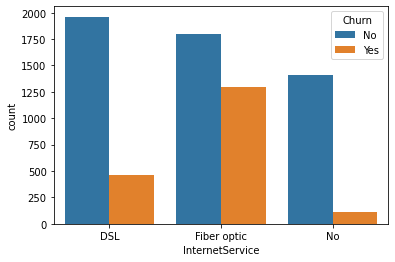

In [15]:
sns.countplot(x='InternetService',hue='Churn',data=df)

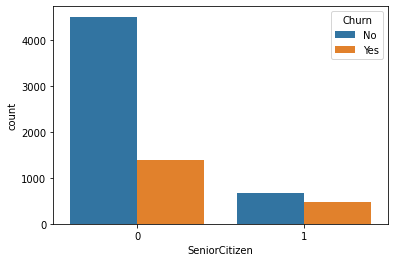

In [16]:
sns.countplot(x='SeniorCitizen',hue='Churn',data=df)

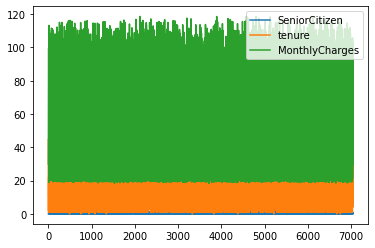

In [17]:
df.plot()

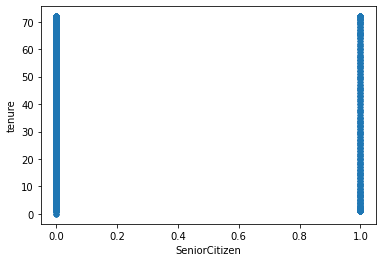

In [18]:
df.plot(kind='scatter',x='SeniorCitizen',y='tenure')

### Data preprocessing

In [19]:
#drop customer id
df=df.drop('customerID',axis=1)

In [20]:
df

gender  SeniorCitizen Partner  ... MonthlyCharges  TotalCharges Churn
0     Female              0     Yes  ...          29.85         29.85    No
1       Male              0      No  ...          56.95        1889.5    No
2       Male              0      No  ...          53.85        108.15   Yes
3       Male              0      No  ...          42.30       1840.75    No
4     Female              0      No  ...          70.70        151.65   Yes
...      ...            ...     ...  ...            ...           ...   ...
7038    Male              0     Yes  ...          84.80        1990.5    No
7039  Female              0     Yes  ...         103.20        7362.9    No
7040  Female              0     Yes  ...          29.60        346.45    No
7041    Male              1     Yes  ...          74.40         306.6   Yes
7042    Male              0      No  ...         105.65        6844.5    No

[7043 rows x 20 columns]

In [50]:
df.shape

(7043, 20)

### Level Encoding Data Preprocessing

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
#le_x=LabelEncoder()

In [53]:
#df=df.apply(le_x.fit_transform)

In [54]:
#df

In [55]:
#or
for column in df.columns:
    if(df[column].dtype==np.number):
        continue
    df[column]=LabelEncoder().fit_transform(df[column])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  This is separate from the ipykernel package so we can avoid doing imports until


In [56]:
df

gender  SeniorCitizen  Partner  ...  MonthlyCharges  TotalCharges  Churn
0          0              0        1  ...           29.85          2505      0
1          1              0        0  ...           56.95          1466      0
2          1              0        0  ...           53.85           157      1
3          1              0        0  ...           42.30          1400      0
4          0              0        0  ...           70.70           925      1
...      ...            ...      ...  ...             ...           ...    ...
7038       1              0        1  ...           84.80          1597      0
7039       0              0        1  ...          103.20          5698      0
7040       0              0        1  ...           29.60          2994      0
7041       1              1        1  ...           74.40          2660      1
7042       1              0        0  ...          105.65          5407      0

[7043 rows x 20 columns]

In [57]:
x=df.drop('Churn',axis=1)
y=df['Churn']

In [58]:
print(x)

      gender  SeniorCitizen  ...  MonthlyCharges  TotalCharges
0          0              0  ...           29.85          2505
1          1              0  ...           56.95          1466
2          1              0  ...           53.85           157
3          1              0  ...           42.30          1400
4          0              0  ...           70.70           925
...      ...            ...  ...             ...           ...
7038       1              0  ...           84.80          1597
7039       0              0  ...          103.20          5698
7040       0              0  ...           29.60          2994
7041       1              1  ...           74.40          2660
7042       1              0  ...          105.65          5407

[7043 rows x 19 columns]


In [59]:
x.shape

(7043, 19)

In [60]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

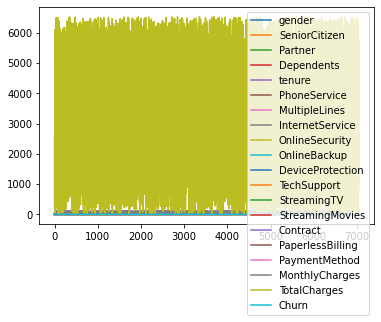

In [61]:
df.plot()

#### Feature Scaling in Data set

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
feature_x=StandardScaler().fit_transform(x)

In [64]:
feature_x

array([[-1.00955867, -0.44014635,  1.03453023, ...,  0.39855772,
        -1.16032292, -0.39860759],
       [ 0.99053183, -0.44014635, -0.96662231, ...,  1.33486261,
        -0.25962894, -0.94876238],
       [ 0.99053183, -0.44014635, -0.96662231, ...,  1.33486261,
        -0.36266036, -1.64188328],
       ...,
       [-1.00955867, -0.44014635,  1.03453023, ...,  0.39855772,
        -1.1686319 , -0.13968008],
       [ 0.99053183,  2.27197156,  1.03453023, ...,  1.33486261,
         0.32033821, -0.31653445],
       [ 0.99053183, -0.44014635, -0.96662231, ..., -1.47405205,
         1.35896134,  1.13801338]])

#### Split Data Set

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train,x_test,y_train,y_test=train_test_split(feature_x,y,test_size=0.25,random_state=42)

In [67]:
x_train.shape

(5282, 19)

In [68]:
x_test.shape

(1761, 19)

In [69]:
x_train

array([[ 0.99053183, -0.44014635, -0.96662231, ...,  0.39855772,
        -1.31154644, -0.58499305],
       [-1.00955867, -0.44014635, -0.96662231, ...,  0.39855772,
         0.34526517,  0.60268471],
       [-1.00955867, -0.44014635, -0.96662231, ..., -1.47405205,
        -1.48603513,  1.5637347 ],
       ...,
       [ 0.99053183, -0.44014635,  1.03453023, ...,  0.39855772,
        -1.44947559, -0.31706396],
       [ 0.99053183,  2.27197156, -0.96662231, ...,  0.39855772,
         1.15289851, -1.5290989 ],
       [ 0.99053183, -0.44014635, -0.96662231, ..., -0.53774716,
        -1.49434411,  0.33475562]])

#### LogisticRegression Algorithm

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
model=LogisticRegression()

In [72]:
model.fit(x_train,y_train)

LogisticRegression()

In [73]:
pred=model.predict(x_test)

In [74]:
pred

array([1, 0, 0, ..., 0, 1, 0])

In [75]:
model.score(x_test,y_test)

0.8103350369108461

#### Performance Metrics

In [76]:
from sklearn.metrics import accuracy_score

In [77]:
accuracy_score(y_test,pred)

0.8103350369108461

#### Confusion matrix

In [78]:
from sklearn.metrics import confusion_matrix

In [79]:
confusion_matrix(y_test,pred)

array([[1163,  119],
       [ 215,  264]])

#### TP=1163, FP=119, FN=215, TN=264

#### Classification report

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1282
           1       0.69      0.55      0.61       479

    accuracy                           0.81      1761
   macro avg       0.77      0.73      0.74      1761
weighted avg       0.80      0.81      0.80      1761

